# Algerian Forest Fires Dataset Project

## Libraries Installation using pip

In [107]:
'''
pip install -U scikit-learn
pip install dx
pip install sweetviz
pip install graphviz
pip install plotly==5.4.0
pip install dtale
...

'''

import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
install("matplotlib")

## Libraries Importation

In [507]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import sweetviz as sv
from pandas_profiling import ProfileReport


## Explatory Data Analysis
> <b>Importing & displaying the raw dataset </b>

In [508]:
raw= pd.read_csv('./datasets/Algerian_forest_fires_df.csv')
raw

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


> <b>Displaying the dataset columns</b>

In [509]:
raw.columns

Index(['Bejaia Region Dataset '], dtype='object')

> <b>Fixing the dataset headers</b>

In [510]:
df= pd.read_csv('./datasets/Algerian_forest_fires_df.csv',header=[1])
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


> <b>fixed dataset columns</b>

In [511]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

> <b>Removing the whitespace from the start and the end of the columns headers</b>

In [512]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

> <b>Displaying the first region</b>

In [513]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


> <b>Displaying the second region</b>

In [514]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


> <b>Adding New column Region</b>

In [515]:
# 1 : "Bejaia Region Dataset"
# 2 : "Sidi-Bel Abbes Region Dataset"
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2

In [516]:
df.Region.dtype

dtype('float64')

> <b>Fixing the new column data type</b>

In [517]:
df[['Region']] = df[['Region']].astype(int)

>  <b> Summing the null values  </b>

In [518]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [519]:
df.loc[df['Region'] == 2]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


> <b> Dropping the region raw & redundant headers </b>

In [520]:
df = df.drop(122)
df = df.drop(123)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [521]:
df[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


>  <b>Reseting the observation indexes</b>

In [522]:
df= df.reset_index(drop=True)
df[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


> <b>No nulls values in the dataset (1 in Classes -> Covering it in the next chunks)</b>

In [523]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

 <b> The dataset Overview  </b> : <br>
> - The number of observation & attributes
> - The dataset type
> - the dataset dimension

In [524]:
print("The dataset shape: ",df.shape)

The dataset shape:  (244, 15)


In [525]:
print("Type of the dataset: ",type(df))

Type of the dataset:  <class 'pandas.core.frame.DataFrame'>


In [526]:
print("The number of dimensions: ",df.ndim)

The number of dimensions:  2


> <b> The observation with the NaN value on the 'Classes' attribute </b>

In [527]:
df.loc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               2
Name: 165, dtype: object

> <b> DC,ISI,BUI,FWI,Classes values shifting </b>

In [528]:
shift = df.iloc[165]['DC'].split(' ')
df.loc[165,'DC']=shift[0]
permutation = df.loc[165,'ISI']
df.loc[165,'ISI'] = shift[1]
permutation2 = df.loc[165,'BUI']
df.loc[165,'BUI'] = permutation
permutation3 = df.loc[165,'FWI']
df.loc[165,'FWI']= permutation2
df.loc[165,'Classes']= permutation3

> <b> Fixed Observation </b>

In [529]:
df.loc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC                14.6
ISI                  9
BUI               12.5
FWI               10.4
Classes        fire   
Region               2
Name: 165, dtype: object

> <b> No null values in the dataset </b>

In [530]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [531]:
df.isna()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [532]:
df.isna().sum().sum()

0

> <b> The columns misdatatyping </b>

In [533]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

> <b> Fixing The columns data type </b>

In [534]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)
# it is more memory efficient to use shorter integer/float numbers when handling a large dataset. 

> <b> Fixed columns data type </b>

In [535]:
print("The attribute types: ")
print(df.dtypes)

The attribute types: 
day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object


> <b> Displaying the first 5 observation of the dataset </b>

In [536]:
print(df.head(5))

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          1  
1  0.4  not fire          1  
2  0.1  not fire          1  
3  0.0  not fire          1  
4  0.5  not fire          1  


> <b> Displaying the last 5 observation of the dataset </b>

In [537]:
print(df.tail())

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
239   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
239  6.5       fire          2  
240  0.0   not fire          2  
241  0.2   not fire          2  
242  0.7   not fire          2  
243  0.5  not fire           2  


> <b> The number of unique values of every attributes. </b>

In [538]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            173
FWI            126
Classes          8
Region           2
dtype: int64

In [539]:
df['month'].unique()

array([6, 7, 8, 9])

In [540]:
df['year'].unique()

array([2012])

> <b> Fixing the uniqueness of the attributes 'Classes' by removing the whitespace from its observations values </b>

In [541]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [542]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

> <b> Exporting the clean datasets </b>

In [543]:
df.to_csv('./datasets/Algerian_forest_fires_df_cleaned.csv')

> <b> Creating a visual report for the dataset </b>

In [545]:
my_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [546]:
my_report.show_html('./reports/df_report.html', open_browser=False)

Report ./reports/df_report.html was generated.


> <b> Descriptive statistics </b>

In [547]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile

> <b> Data Visualization</b>
- When Do Most Forest Fires Occur?

In [549]:
conditions = [
    (df['Classes'] == 'fire'),
    (df['Classes'] == 'not fire'),
    ]
values = [1,0]
df['Class'] = np.select(conditions, values)
df['Class'].dtypes

dtype('int32')

In [553]:
fire = df.loc[df['Class'] == 1]
by_month =  fire.groupby(['month'], as_index=False)['Class'].sum()

<AxesSubplot:xlabel='month', ylabel='Class'>

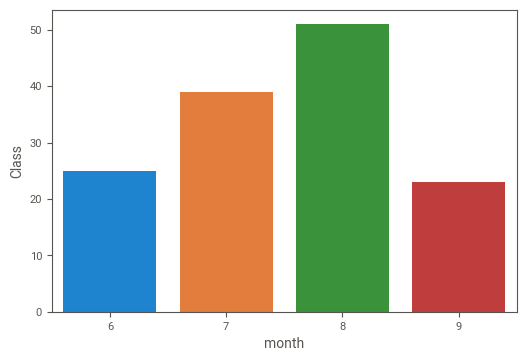

In [554]:
sns.barplot(x='month', y="Class", data=by_month[['month','Class']], estimator=sum)

<AxesSubplot:xlabel='month', ylabel='Class'>

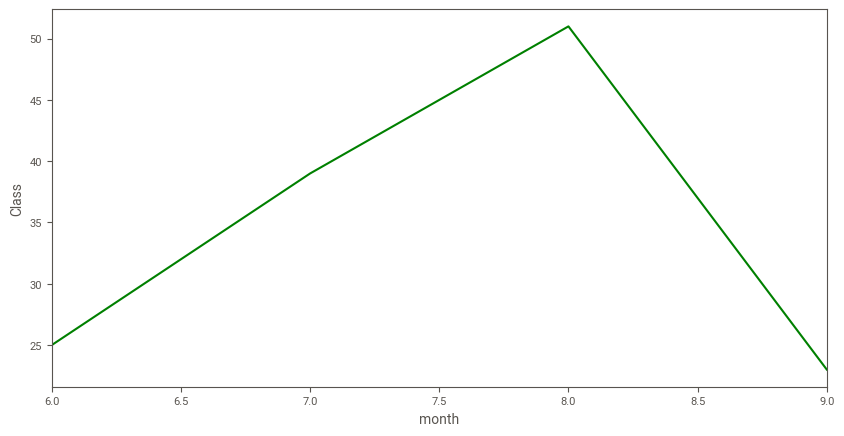

In [555]:
plt.figure(figsize=[10,5])
plt.xlim([6,9])
sns.lineplot(x='month', y="Class", data=by_month[['month','Class']], color='green')

[Text(0.5, 0, 'Temperature in C'), Text(0, 0.5, 'Fire Count')]

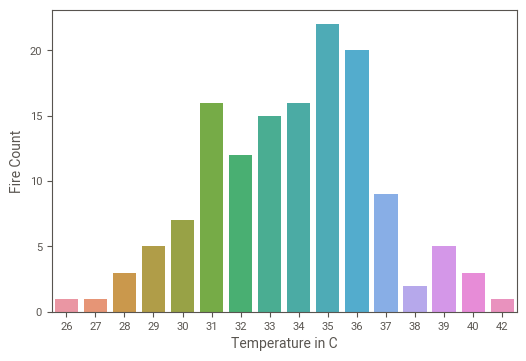

In [556]:
by_temperature =  fire.groupby(['Temperature'], as_index=False)['Class'].sum()
ax = sns.barplot(x='Temperature', y="Class", data=by_temperature[['Temperature','Class']], estimator=sum)
ax.set(xlabel='Temperature in C', ylabel='Fire Count')

<AxesSubplot:xlabel='Temperature', ylabel='Class'>

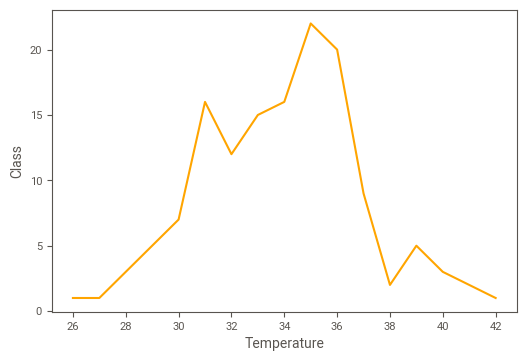

In [557]:
sns.lineplot(x='Temperature', y="Class", data=by_temperature[['Temperature','Class']],color='orange')

[Text(0.5, 0, 'Rain in mm'), Text(0, 0.5, 'Fire Count')]

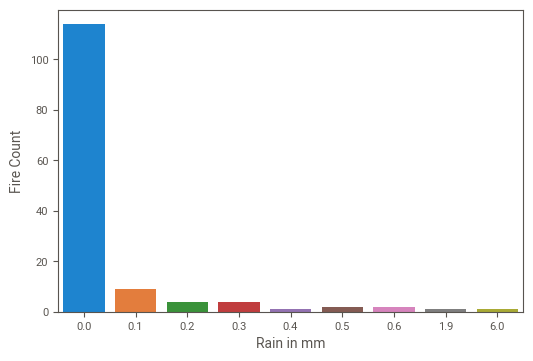

In [558]:
by_rain =  fire.groupby(['Rain'], as_index=False)['Class'].sum()
ax = sns.barplot(x='Rain', y="Class", data=by_rain[['Rain','Class']], estimator=sum)
ax.set(xlabel='Rain in mm', ylabel='Fire Count')

In [559]:
df_Corr = df[['day','month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region','Class']]
df_Corr = df_Corr.corr()
df_Corr

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Class
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,3.909990e-16,0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,-2.023760e-16,0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,2.734961e-01,0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-4.064239e-01,-0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-1.768290e-01,-0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-4.108006e-02,-0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,2.246798e-01,0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,1.910937e-01,0.584188
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-8.148947e-02,0.507122
ISI,1.793008e-01,6.354476e-02,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,2.662977e-01,0.736142


array([[<AxesSubplot:xlabel='day', ylabel='day'>,
        <AxesSubplot:xlabel='month', ylabel='day'>,
        <AxesSubplot:xlabel='Temperature', ylabel='day'>,
        <AxesSubplot:xlabel='RH', ylabel='day'>,
        <AxesSubplot:xlabel='Ws', ylabel='day'>,
        <AxesSubplot:xlabel='Rain', ylabel='day'>,
        <AxesSubplot:xlabel='FFMC', ylabel='day'>,
        <AxesSubplot:xlabel='DMC', ylabel='day'>,
        <AxesSubplot:xlabel='DC', ylabel='day'>,
        <AxesSubplot:xlabel='ISI', ylabel='day'>,
        <AxesSubplot:xlabel='BUI', ylabel='day'>,
        <AxesSubplot:xlabel='FWI', ylabel='day'>,
        <AxesSubplot:xlabel='Region', ylabel='day'>,
        <AxesSubplot:xlabel='Class', ylabel='day'>],
       [<AxesSubplot:xlabel='day', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='Temperature', ylabel='month'>,
        <AxesSubplot:xlabel='RH', ylabel='month'>,
        <AxesSubplot:xlabel='Ws', ylabel='month'>,
        <AxesSubp

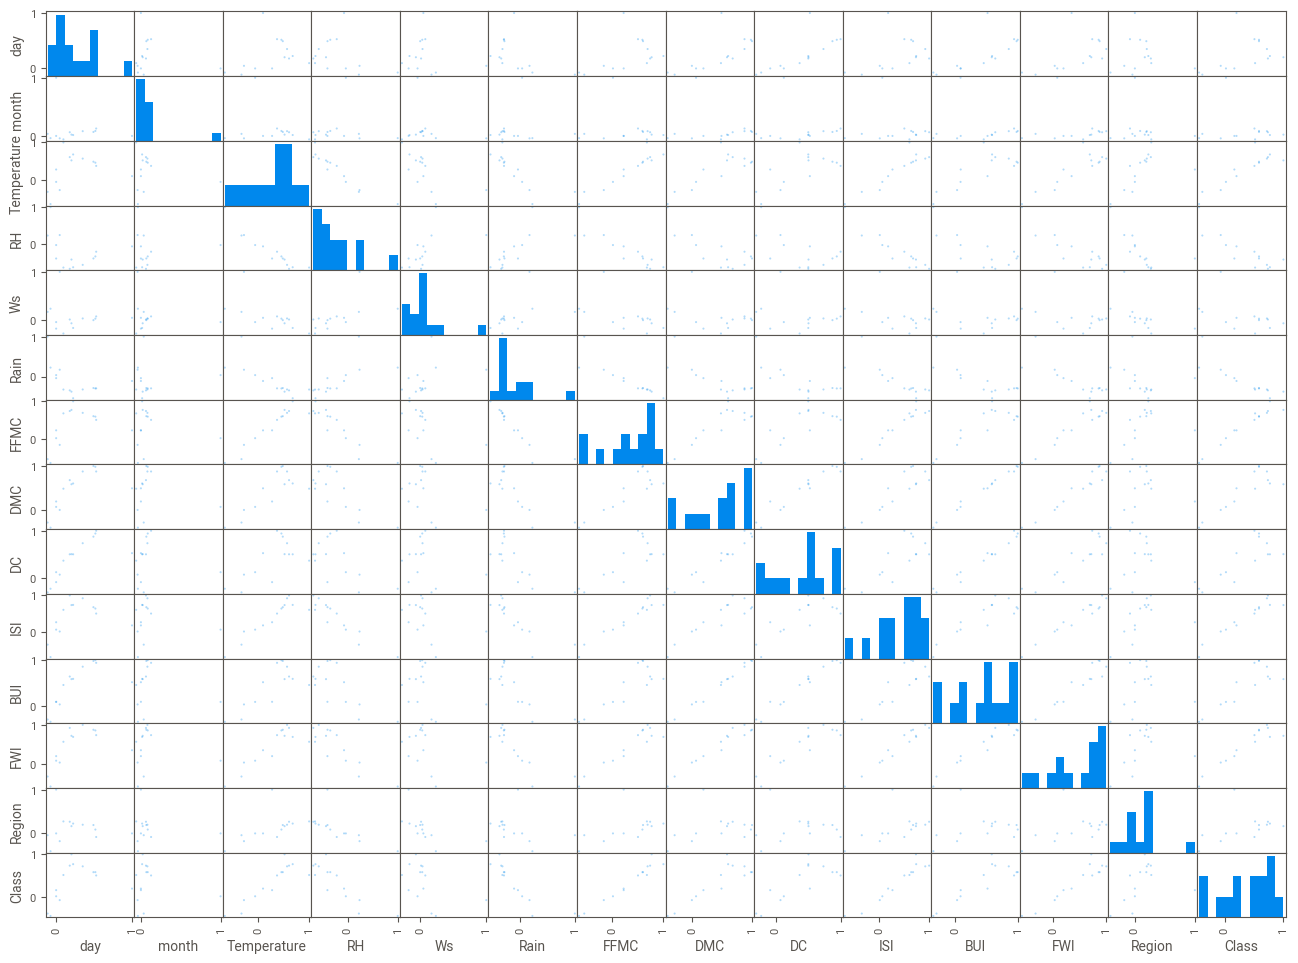

In [562]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_Corr, figsize=(16,12), alpha=0.3)

## Clustering the instances

In [34]:
#from mplsoccer.pitch import Pitch
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [39]:
y_predicted = km.fit_predict(df[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']])
df['cluster'] = y_predicted
df.head()
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0,
       0, 0])

In [256]:
df_cl1 = df[df.cluster == 0]
df_cl2 = df[df.cluster == 1]
df_cl3 = df[df.cluster == 2]
plt.figure(figsize=[12,7])
plt.show()

<Figure size 864x504 with 0 Axes>

In [ ]:
def plot_boxplot(df, ft):
    df.boxplot(column=ft)
    plt.grid(False)
    plt.show()
    
plot_boxplot(df,["Temperature"])
plot_boxplot(df,["Rain"])
plot_boxplot(df,["DC"])

In [ ]:
'''
Since There is no precise mathematical definition of outliers. 
Our knowledge about the subject , and common sense 
help us to determine that data point is an outlier and how to handle it.
'''

## Building the machine learning models for classification

> <b> Splitting the data into train & test sets </b>

In [563]:
from sklearn.model_selection import train_test_split

In [567]:
X = df[['day','month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']]
y = df[['Class']]

In [568]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [569]:
compare_report = sv.compare([X_train,'Train'],[X_test,'Test'])
compare_report.show_html('./reports/compare.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report ./reports/compare.html was generated.


In [570]:
X_train.shape, X_test.shape

((170, 13), (74, 13))

In [571]:
X_train.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.030393,0.116273,-0.077074,0.052375,-0.107067,0.286417,0.540026,0.570296,0.217347,0.563606,0.400988,0.042175
month,-0.030393,1.000000,-0.037043,-0.004489,-0.112905,0.065170,-0.008952,0.072472,0.143307,0.082818,0.093136,0.101359,0.011028
Temperature,0.116273,-0.037043,1.000000,-0.650319,-0.248276,-0.368079,0.700507,0.478403,0.368775,0.595906,0.452415,0.561906,0.249566
RH,-0.077074,-0.004489,-0.650319,1.000000,0.234218,0.254956,-0.639337,-0.379315,-0.199280,-0.689007,-0.326874,-0.571411,-0.399577
Ws,0.052375,-0.112905,-0.248276,0.234218,1.000000,0.262905,-0.158314,0.007078,0.092297,0.020803,0.043831,0.043809,-0.213898
Rain,-0.107067,0.065170,-0.368079,0.254956,0.262905,1.000000,-0.573040,-0.289100,-0.293873,-0.347230,-0.299200,-0.326896,-0.090312
FFMC,0.286417,-0.008952,0.700507,-0.639337,-0.158314,-0.573040,1.000000,0.604870,0.506945,0.743480,0.594823,0.704538,0.229336
DMC,0.540026,0.072472,0.478403,-0.379315,0.007078,-0.289100,0.604870,1.000000,0.875902,0.646728,0.981662,0.861953,0.197265
DC,0.570296,0.143307,0.368775,-0.199280,0.092297,-0.293873,0.506945,0.875902,1.000000,0.488943,0.940235,0.737468,-0.079082
ISI,0.217347,0.082818,0.595906,-0.689007,0.020803,-0.347230,0.743480,0.646728,0.488943,1.000000,0.618680,0.911256,0.262424


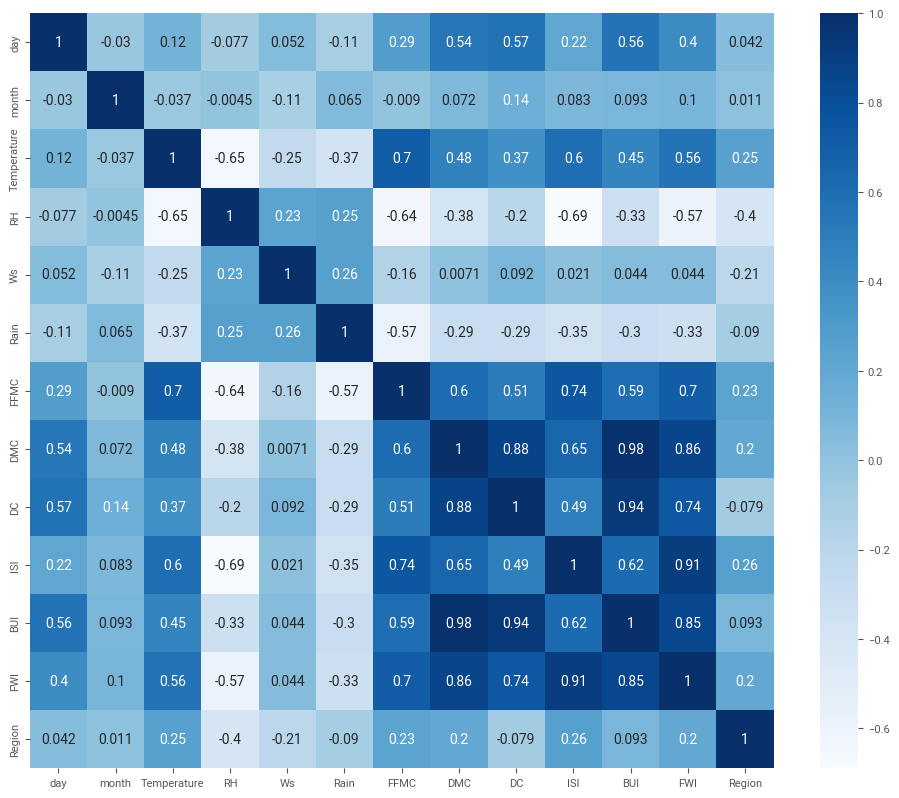

In [572]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

> In order to not affect our model and end up with the overfitting and to wisely select our features for the ML Models, we will go through the following steps:
> - we need to select the highly correlated features
> - drop the first feature that is correlated with another feature

In [573]:
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [580]:
corr_features = correlation(X_train, 0.8)
len(corr_features), corr_features

(3, {'BUI', 'DC', 'FWI'})

In [581]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region
24,25,6,31,64,15,0.0,86.7,14.2,5.7,1
6,7,6,33,54,13,0.0,88.2,9.9,6.4,1
153,2,7,33,48,16,0.0,87.6,7.9,6.8,2
211,29,8,35,53,17,0.5,80.2,20.7,2.7,2
198,16,8,40,41,10,0.1,92.0,22.6,9.5,2
...,...,...,...,...,...,...,...,...,...,...
165,14,7,37,37,18,0.2,88.9,12.9,9.0,2
154,3,7,34,56,17,0.1,84.7,9.7,4.7,2
216,3,9,28,75,16,0.0,82.2,4.4,3.3,2
79,19,8,35,62,19,0.0,89.4,23.2,9.7,1


> <b> Building the Random forest Classifier </b>

In [582]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [583]:
model.fit(X_train,y_train.values.ravel())
#values will give the values in an array. (shape: (n,1)
#ravel will convert that array shape to (n, )
y_train.values.ravel()

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [584]:
model.score(X_test,y_test)

0.9594594594594594

In [585]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Text(74.72222222222221, 0.5, 'Truth')

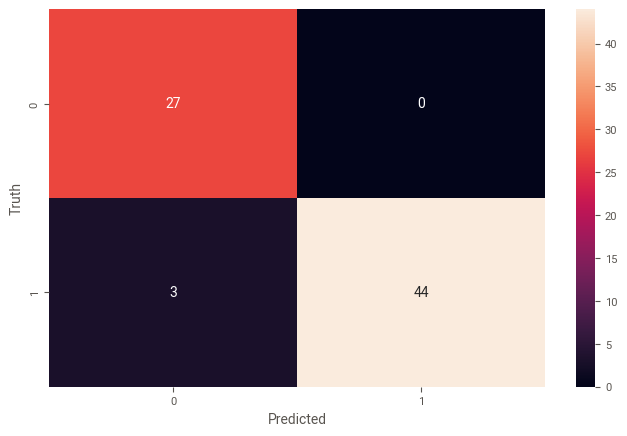

In [586]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [587]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.94      0.97        47

    accuracy                           0.96        74
   macro avg       0.95      0.97      0.96        74
weighted avg       0.96      0.96      0.96        74



In [ ]:
# SVM is better suited in case of data with large feature space and lesser observations
#if the training data is smaller or if the dataset has a fewer number of observations and a higher number of features 
#like genetics or textual data, choose algorithms with high bias/low variance like Linear regression, Naïve Bayes, or Linear SVM.

> <b> Building the Support Vector Classification Model </b>

In [588]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train,y_train.values.ravel())

SVC()

In [589]:
model2.score(X_test,y_test)

0.918918918918919

In [590]:
y_pred2 = model2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.94      0.94      0.94        47

    accuracy                           0.92        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.92      0.92      0.92        74



Text(74.72222222222221, 0.5, 'Truth')

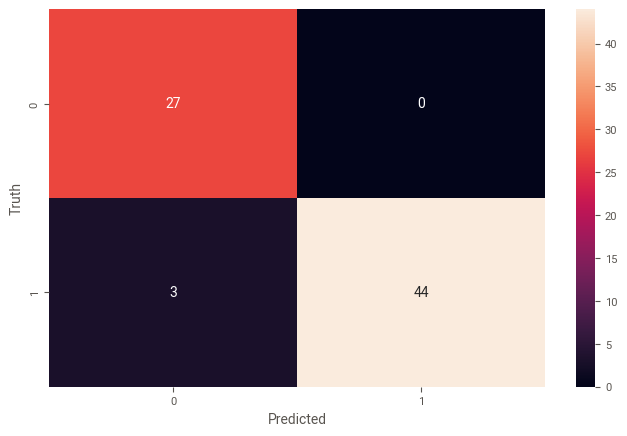

In [591]:
plt.figure(figsize=(8,5))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

> #### K Fold Cross Validation for Evaluating the models Performance

In [592]:
from sklearn.model_selection import cross_val_score

In [593]:
cross_val_score(SVC(),X, y.values.ravel(),cv=5)

array([0.91836735, 0.83673469, 0.85714286, 0.97959184, 0.91666667])

In [594]:
cross_val_score(RandomForestClassifier(),X, y.values.ravel(),cv=5)

array([0.97959184, 0.93877551, 1.        , 1.        , 1.        ])